# Computer Vision: Image Identification / Classification from fashion_mnist dataset using TensorFlow

**Domain:**Image Identification / Classification

**About:**
Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

**Problem Statement:** To predict correct label for each image given in test dataset.

Description text source: https://www.tensorflow.org/datasets/catalog/fashion_mnist

To see image, visit: https://github.com/zalandoresearch/fashion-mnist

**We will use GPU for this notebook to speed up process.**


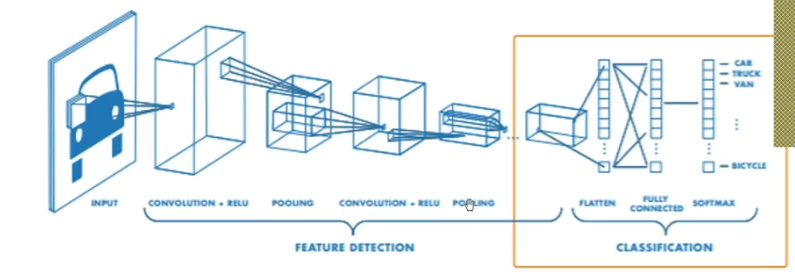

In [1]:
from IPython.display import Image
Image("../input/cvcnnimages/1.png")

# Importing packages

In [2]:
# importing tensorflow and keras

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

In [3]:
# Printing version of the TensorFlow

print(tf.__version__)

2.3.0


# Loading the Dataset

In [4]:
# Loading the dataset

fashion_mnist=keras.datasets.fashion_mnist # Loading the dataset

(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

# see the size of the dataset
# print("Train Images Shape: %s \nTrain Labels: %s \nTest Images Shape: %s \nTest Labels: %s"  % (xtrain.shape, xtrain,xtest.shape,ytest))


4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 ... 3 0 5]


Observations:
* There are 60,000 images. We assigned 10,000 to test dataset
* Images are black and white and is of 28 x 28 pixels
* Train Images: Array of 60,000 images in 28 X 28 pixel
* Train Labels: Integer array of 60,000 labels, value between 0 to 9
* Test Images: Array of 10,000 images in 28 X 28 pixel
* Test Labels: Integer array of 10,000 labels, value between 0 to 9
* Each image mapped to a single label
* Each integer value in label array represent clothing item

In [5]:
# Defining array. Each item of array represent integer value of labels. 10 clothing item for 10 integer label.

class_names =['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Evaluation of the data

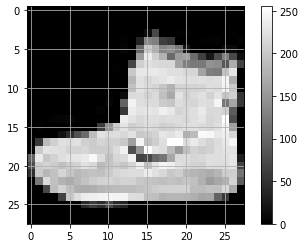

Class ID: 9 and Class name: Ankle boot


In [6]:
# inspect the data in the array

index=0 # change this number 
plt.imshow(xtrain[index], cmap='gray') # printing 10th image
plt.colorbar() # shows the bar on the right side of the image
plt.grid(True) # will shot the grid
plt.show()
print("Class ID: %s and Class name: %s" % (ytrain[index], class_names[ytrain[index]]))

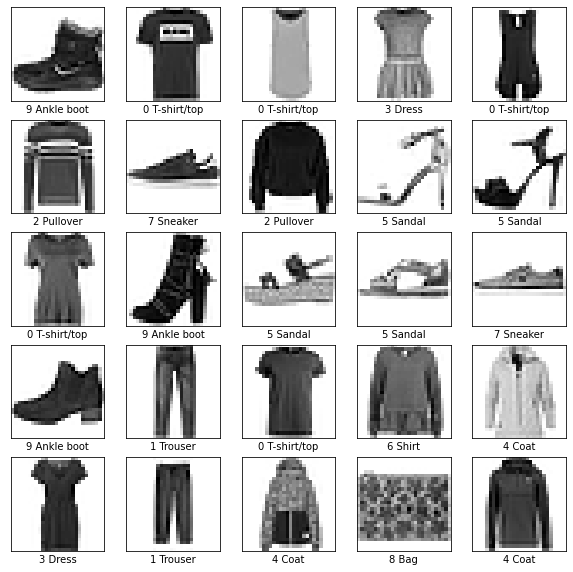

In [7]:
# display the first 25 images from traing set

plt.figure(figsize=(10,10))
for i in range(25): # 25 images
  plt.subplot(5,5,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()

# Data Preparation

## Scaling the image values

In [8]:
# Pixel value of the image falls between 0 to 255.

xtrain = xtrain/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtrain.shape)

xtest = xtest/255 # So, we are scale the value between 0 to 1 before by deviding each value by 255
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


## One hot encoding of the labels
- This is NOT required in two-class classification problem
- This is REQUIRED in multi-class classification problem
- This is 10 class classification problem so after one hot encoding it will generate 10 columns i.e. 10 output nurons for each label

In [9]:
# One hot encoding of the labels.
#(generally we do one hot encoding of the features in EDA but in this case we are doing it for labels)

# Before one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest))

ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

# After one hot encoding
print("ytrain Shape: %s and value: %s" % (ytrain.shape, ytrain[0]))
print("ytest Shape: %s and value: %s" % (ytest.shape, ytest[1]))

ytrain Shape: (60000,) and value: [9 0 0 ... 3 0 5]
ytest Shape: (10000,) and value: [9 2 1 ... 8 1 5]
ytrain Shape: (60000, 10) and value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
ytest Shape: (10000, 10) and value: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Modelling - Model on CNN
- There are 2 ways to program CNN with keras:
  - Sequential approach: Here, we generally add layers in sequence.
  - Modular approach: This is more important. This more dynamic, cusotmized, moulded and easy to explore. We generally use this.

Effectiveness in both the approach will remain same.

We are creating this model based on lecun-99
Source: http://yann.lecun.com/exdb/publis/pdf/lecun-99.pdf



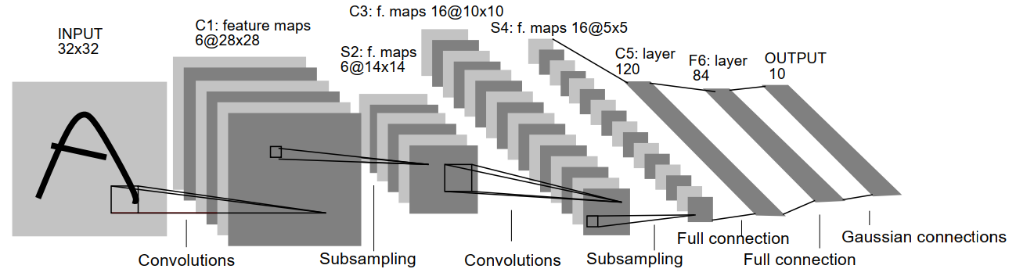

In [10]:
from IPython.display import Image
Image("../input/cvcnnimages/2.png")

## Building model

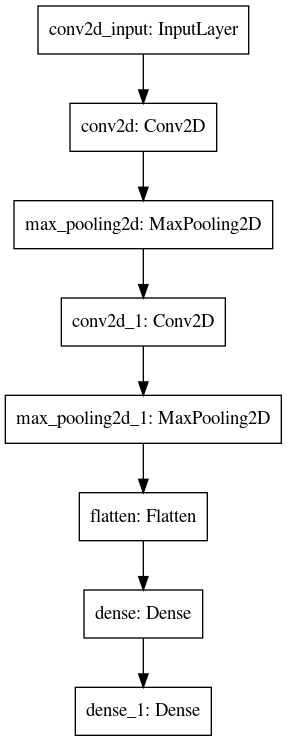

In [11]:
# Modelling - Model on CNN

from tensorflow.keras import models, layers

# create a sequential model i.e. empty neural network which has no layers in it.
model=models.Sequential()

#==================== Feature Detection / extraction Block ====================#

# Add first convolutional block - To deal with images we use Conv2D and for colour images and shape use Conv3D
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), input_shape=(28,28,1), activation='relu'))
# in the first block we need to mention input_shape
model.add(layers.Conv2D(6,(3,3),input_shape=(28,28,1),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

# Add Second convolutional block
#model.add(layers.Conv2D(filters=6, kernal_size(3,3), activation='relu'))
model.add(layers.Conv2D(10,(3,3),activation='relu'))
# Add the max pooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#==================== Transition Block (from feature detection to classification) ====================#

# Add Flatten layer. Flatten simply converts matrics to array
model.add(layers.Flatten(input_shape=(28,28))) # this will flatten the image and after this Classification happens

#==================== Classification Block ====================#

# Classification segment - fully connected network
# The Dence layer does classification and is deep neural network. Dense layer always accept the array.
model.add(layers.Dense(128, activation='relu')) # as C5 layer in above image. 
# this 120 is hyper parameter whcih is number of neuron 
#model.add(layers.Dense(84, activation='relu'))# as F6 layer in aboave image

# Add the output layer
model.add(layers.Dense(10, activation='softmax')) # as Output layer in above image. The output layer normally have softmax activation

# Ploting the Model
plot_model(model)

## Compile the model

In [12]:
# Compile the model

# if we use softmax activation in output layer then best fit optimizer is categorical_crossentropy
# for sigmoid activation in output layer then loss will be binary_crossentropy

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
# if we do not go for One Hot Encoding then use loss='sparse_categorical_crossentropy'

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 10)        550       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32128     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

Reading the summary:
- There are 5 computational layers i.e. all the layers where param value is non-zero that is why it is called LeNet-5.
- Params are weights and bias
- the value 60 = 6 filters X  kernal size 9 i.e.(3 X 3) = 54 + 6 bias (equal to number of filters) = 60
- the value 550 = 10 filters X  kernal size 9 i.e.(3 X 3) = 90 X 6 filters of earliar layer = 540 + 10 bias (equal to number of filters) = 550
- In case of Dense layer 30120 = 250 X 120 = 30,000 + 120 bias
- In case of Dense layer 10164 = 120 X 84 = 10080 + 84 bias

## Train the model

In [13]:
# Train the model 
# Using GPU really speeds up this code
xtrain2=xtrain.reshape(60000,28,28,1)
xtest2=xtest.reshape(10000,28,28,1)

# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

model.fit(xtrain2,ytrain,epochs=20,batch_size=1000,verbose=True,validation_data=(xtest2,ytest))

Epoch 1/20
60/60 [==============================] - 1s 10ms/step - loss: 1.3741 - accuracy: 0.5892 - val_loss: 0.7509 - val_accuracy: 0.7257
Epoch 2/20
60/60 [==============================] - 0s 7ms/step - loss: 0.6561 - accuracy: 0.7580 - val_loss: 0.6185 - val_accuracy: 0.7681
Epoch 3/20
60/60 [==============================] - 0s 6ms/step - loss: 0.5619 - accuracy: 0.7926 - val_loss: 0.5580 - val_accuracy: 0.7953
Epoch 4/20
60/60 [==============================] - 0s 6ms/step - loss: 0.5120 - accuracy: 0.8115 - val_loss: 0.5173 - val_accuracy: 0.8102
Epoch 5/20
60/60 [==============================] - 0s 6ms/step - loss: 0.4828 - accuracy: 0.8212 - val_loss: 0.4913 - val_accuracy: 0.8204
Epoch 6/20
60/60 [==============================] - 0s 7ms/step - loss: 0.4578 - accuracy: 0.8327 - val_loss: 0.4713 - val_accuracy: 0.8274
Epoch 7/20
60/60 [==============================] - 0s 7ms/step - loss: 0.4356 - accuracy: 0.8433 - val_loss: 0.4531 - val_accuracy: 0.8334
Epoch 8/20
60/60 [=

# Evaluation of the model

## Evaluating model accuracy

In [14]:
# evaluate accuracy of the model

test_loss, test_acc = model.evaluate(xtest2, ytest)
print("accuracy:", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3681 - accuracy: 0.8703
accuracy: 0.8702999949455261


Observation:
* there is a very little gap between accracy of train and test model i.e. 0.91 and 0.89 that means model is little overfitting

## Predicting label

In [15]:
# predicting lable for test_images

predictions=model.predict(xtest2)

# Prediction of the 1st result. It will show the 10 predictions of labels for test image
print("1. Prediction array: %s" % (predictions[0]))

# we will verify that which result for label has highest confidence
print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

# let us verify what is the label in test_labels.
print("3. Actual label in dataset: %s" % (ytest[0]))

1. Prediction array: [8.4811074e-07 1.4107369e-09 2.2617387e-08 4.9875908e-08 4.5912711e-06
 1.6710170e-03 1.1357963e-06 3.2453969e-02 5.7907251e-04 9.6528935e-01]
2. Label number having highest confidence in prediction array: 9
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Observation:
* This means model shows most confidence about 1st test_image is 'Ankle boot' ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
* test_labels[0] also gives result as 9 (i.e. 'Ankle boot'). So, the prediction is correct. The data is one hot encoded so there is 1 at the last


# Testing the model on data

## Creating a function to verify prediction is True or False

In [16]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

## Test for single image

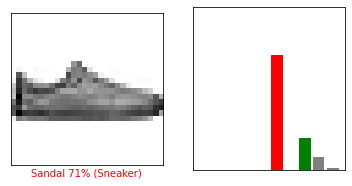

In [17]:
# call the function

# defining parameters to pass to function
i=12 # image number 56. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

## Test for single image

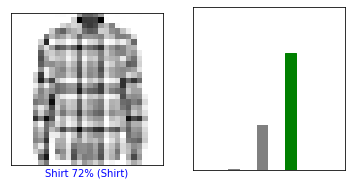

In [18]:
# call the function

# defining parameters to pass to function
i=7 # image number 5. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

## Test for single image

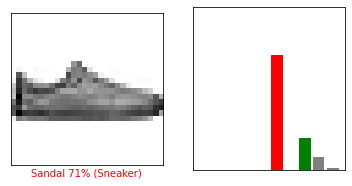

In [19]:
# call the function

# defining parameters to pass to function
i=12 # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, ytest, xtest)
plt.subplot(1,2,2)
plot_value_array(i, predictions, ytest)
plt.show()

(28, 28, 1)
(1, 28, 28, 1)
[[2.3972851e-05 9.9965608e-01 3.2096690e-07 2.2935093e-04 8.2402948e-05
  4.1032953e-07 1.3558108e-06 2.3913719e-08 6.0615052e-06 8.4956602e-09]]


1

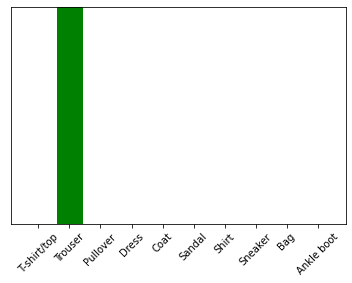

In [20]:
# verification our prediction on single image

i=24 # image number 0. You may change value of i for play around
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])

## Verifying several images

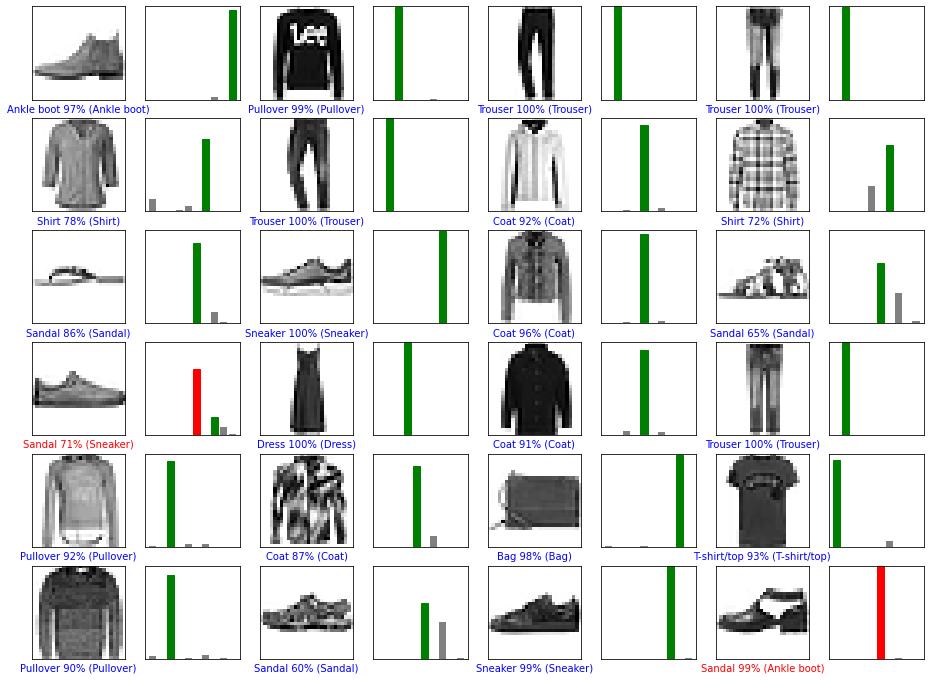

In [21]:
# verification of several images

num_rows=6
num_cols=4
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i,predictions, ytest, xtest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, ytest)
plt.show()

# Conclusions

* With a complex sequential model with multiple convolution layers and 20 epochs for the training, we obtained an accuracy ~0.91 for test prediction. 
* After investigating the validation accuracy and loss, we understood that the model is overfitting.
* Model may be retrained with Dropout layers to reduce overfitting.
* Most of the images can be identified except few.